In [1]:
#pip install pyforest

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


Hİnt for metric : Our mission to classify soldiers races via their body sclales. We want a balanced score for our predictions.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)

# Ingest the data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="latin-1")
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

# EDA
Tips :
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Find unusual value in Weightlbs

### Concating df_male and df_female

In [6]:
df_female.rename({"SubjectId": "subjectid"}, axis=1, inplace=True)

In [7]:
df_male.shape

(4082, 108)

In [8]:
df_female.shape

(1986, 108)

In [9]:
df = pd.concat([df_male, df_female])

### Null values check

In [10]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
WritingPreference                    0
forearmforearmbreadth                0
crotchlengthomphalion                0
crotchlengthposterioromphalion       0
                                  ... 
span                                 0
stature                              0
suprasternaleheight                  0
tenthribheight                       0
subjectid                            0
Length: 108, dtype: int64

In [11]:
df.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand


### Dropping Columns

In [12]:
df["SubjectNumericRace"].unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351],
      dtype=int64)

In [13]:
df = df.drop(["Date", "Installation", "Component", "Branch","PrimaryMOS", "SubjectsBirthLocation",
         "Ethnicity", "WritingPreference", "SubjectNumericRace"], axis=1)

In [14]:
df.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,DODRace,Age,Heightin,Weightlbs
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,1,41,71,180
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,1,35,68,160


### Reducing target columns labels

In [15]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [16]:
df[(df.DODRace == 1) | (df.DODRace == 2) | (df.DODRace == 3)].DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [17]:
df = df[(df.DODRace == 1) | (df.DODRace == 2) | (df.DODRace == 3)]

In [18]:
df.shape

(5769, 99)

### Weightlbs outlier

<AxesSubplot:xlabel='Weightlbs'>

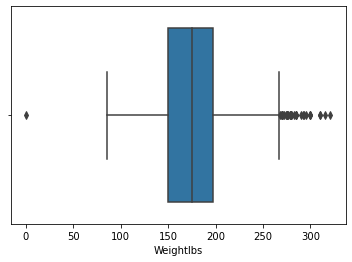

In [19]:
sns.boxplot(data=df, x="Weightlbs")

In [20]:
df[df.Weightlbs < 50].Weightlbs

866    0
Name: Weightlbs, dtype: int64

In [21]:
df = df[df.Weightlbs > 50]

### get_dummies for Gender columns

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
df.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age,Heightin,Weightlbs,Gender_Male
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,41,71,180,1
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1,35,68,160,1


In [24]:
df.shape

(5768, 99)

# DATA Preprocessing

In [25]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

### Train | Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling Implementing
- You can use pipeline (optional)
- You can research over/undersampling methods and after selecting the best model, examine it to see if better scores can be obtained. (https://imbalanced-learn.org/stable/introduction.html)

## 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model=LogisticRegression(class_weight="balanced",solver='saga',multi_class="ovr",max_iter=10000)
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_train = log_model.predict(X_train_scaled)

### Model Performance

In [36]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred, average="weighted"),
                            "Recall" : recall_score(y_train, y_train_pred, average="weighted"),                          
                            "f1" : f1_score(y_train, y_train_pred, average="weighted")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred, average="weighted"),
                           "Recall" : recall_score(y_test, y_pred, average="weighted"),                          
                           "f1" : f1_score(y_test, y_pred, average="weighted")}}
    
    return pd.DataFrame(scores)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_pred_train, y_test, y_pred)

[[989  30 118]
 [ 14 359  12]
 [ 62  20 127]]
              precision    recall  f1-score   support

           1       0.93      0.87      0.90      1137
           2       0.88      0.93      0.90       385
           3       0.49      0.61      0.55       209

    accuracy                           0.85      1731
   macro avg       0.77      0.80      0.78      1731
weighted avg       0.86      0.85      0.86      1731



,train_set,test_set
Accuracy,0.854595,0.852109
Precision,0.872741,0.864862
Recall,0.854595,0.852109
f1,0.861240,0.856964


### Cross Validate

In [40]:
from sklearn.model_selection import cross_validate

In [39]:
model = LogisticRegression(class_weight="balanced",solver='saga',multi_class="ovr",max_iter=10000)

scores = cross_validate(model, X_train_scaled, y_train, scoring=["accuracy","precision_weighted",
                                                                 "recall_weighted", "f1_weighted"], cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy              0.836012
test_precision_weighted    0.857958
test_recall_weighted       0.836012
test_f1_weighted           0.844270
dtype: float64

In [43]:
log_acc = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average="weighted")
log_rc = recall_score(y_test, y_pred, average="weighted")

## 2. Support Vector Classifier

In [44]:
from sklearn.svm import SVC

### base svc

In [45]:
svm_model = SVC(class_weight = "balanced")
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
y_pred_train = svm_model.predict(X_train_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_pred_train, y_test, y_pred)

[[939  23 175]
 [ 18 345  22]
 [ 60  20 129]]
              precision    recall  f1-score   support

           1       0.92      0.83      0.87      1137
           2       0.89      0.90      0.89       385
           3       0.40      0.62      0.48       209

    accuracy                           0.82      1731
   macro avg       0.74      0.78      0.75      1731
weighted avg       0.85      0.82      0.83      1731



,train_set,test_set
Accuracy,0.875403,0.816291
Precision,0.907016,0.852011
Recall,0.875403,0.816291
f1,0.884736,0.829441


### Cross Validate

In [47]:
model = SVC(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy              0.816692
test_precision_weighted    0.855004
test_recall_weighted       0.816692
test_f1_weighted           0.830356
dtype: float64

In [65]:
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.763333,0.149601,0.832921,0.860748,0.832921,0.843701
2,0.763536,0.150177,0.816832,0.865027,0.816832,0.832923
3,0.764110,0.152588,0.824040,0.852381,0.824040,0.834047
4,0.764082,0.153586,0.790582,0.845018,0.790582,0.809310
5,0.778056,0.150598,0.819083,0.851844,0.819083,0.831801


In [49]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average="weighted")
svm_rc = recall_score(y_test, y_pred, average="weighted")

### Grid Search

In [50]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ["scale", "auto", 1, 0.1, 0.01],
              'kernel': ['rbf', 'linear']}

In [51]:
model = SVC(class_weight = "balanced")

grid_svm = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 1).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  9.2min finished


In [52]:
grid_svm.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [53]:
y_pred = grid_svm.predict(X_test_scaled)
y_train_pred = grid_svm.predict(X_train_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[1057   15   65]
 [  30  341   14]
 [ 102   23   84]]
              precision    recall  f1-score   support

           1       0.89      0.93      0.91      1137
           2       0.90      0.89      0.89       385
           3       0.52      0.40      0.45       209

    accuracy                           0.86      1731
   macro avg       0.77      0.74      0.75      1731
weighted avg       0.85      0.86      0.85      1731



,train_set,test_set
Accuracy,1.0,0.856153
Precision,1.0,0.846260
Recall,1.0,0.856153
f1,1.0,0.850049


In [54]:
grid_svm_acc = accuracy_score(y_test, y_pred)
grid_svm_rc = recall_score(y_test, y_pred, average="weighted")
grid_svm_f1 = f1_score(y_test, y_pred, average="weighted")

## 3. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

### Base rf

In [64]:
rf = RandomForestClassifier(class_weight="balanced", random_state=101)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_pred_train = rf.predict(X_train_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[1118   13    6]
 [ 131  254    0]
 [ 189   13    7]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87      1137
           2       0.91      0.66      0.76       385
           3       0.54      0.03      0.06       209

    accuracy                           0.80      1731
   macro avg       0.74      0.56      0.57      1731
weighted avg       0.78      0.80      0.75      1731



,train_set,test_set
Accuracy,1.0,0.796649
Precision,1.0,0.777453
Recall,1.0,0.796649
f1,1.0,0.747891


### Cross Validate

In [66]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy","precision_weighted",
                                                            "recall_weighted", "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

C:\Users\erdem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erdem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test_accuracy              0.810001
test_precision_weighted    0.789596
test_recall_weighted       0.810001
test_f1_weighted           0.763635
dtype: float64

In [67]:
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,1.044882,0.015963,0.821782,0.733560,0.821782,0.769316
2,1.046201,0.013962,0.819307,0.805460,0.819307,0.776916
3,1.111499,0.014953,0.804455,0.788391,0.804455,0.762684
4,1.132961,0.016955,0.826733,0.852014,0.826733,0.780641
5,1.171420,0.017952,0.819307,0.735468,0.819307,0.767410
6,1.112648,0.014956,0.797030,0.833084,0.797030,0.748360
7,1.088540,0.014967,0.806931,0.810546,0.806931,0.763708
8,1.122155,0.017952,0.789082,0.773395,0.789082,0.742751
9,1.107041,0.016956,0.806452,0.835520,0.806452,0.765935
10,1.111680,0.015949,0.808933,0.728521,0.808933,0.758625


In [68]:
rf_acc = accuracy_score(y_test, y_pred)
rf_rc = recall_score(y_test, y_pred, average="weighted")
rf_f1 = f1_score(y_test, y_pred, average="weighted")

### Grid Search

In [69]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[9, 12, 15],
             'min_samples_split':[2, 5, 8]}

In [70]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
grid_rf = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 1).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   38.3s finished


In [71]:
grid_rf.best_params_

{'max_depth': 15,
 'max_features': 4,
 'min_samples_split': 8,
 'n_estimators': 300}

In [72]:
y_pred = grid_rf.predict(X_test)
y_train_pred = grid_rf.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[1097   22   18]
 [ 101  277    7]
 [ 166   20   23]]
              precision    recall  f1-score   support

           1       0.80      0.96      0.88      1137
           2       0.87      0.72      0.79       385
           3       0.48      0.11      0.18       209

    accuracy                           0.81      1731
   macro avg       0.72      0.60      0.61      1731
weighted avg       0.78      0.81      0.77      1731



,train_set,test_set
Accuracy,0.999752,0.807048
Precision,0.999752,0.779255
Recall,0.999752,0.807048
f1,0.999752,0.772854


In [73]:
grid_rf_acc = accuracy_score(y_test, y_pred)
grid_rf_rc = recall_score(y_test, y_pred, average="weighted")
grid_rf_f1 = f1_score(y_test, y_pred, average="weighted")

## 4. XGBoost

In [74]:
from xgboost import XGBClassifier

### base xgb

In [82]:
xgb = XGBClassifier(random_state=101).fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1110   19    8]
 [  44  332    9]
 [ 147   25   37]]
              precision    recall  f1-score   support

           1       0.85      0.98      0.91      1137
           2       0.88      0.86      0.87       385
           3       0.69      0.18      0.28       209

    accuracy                           0.85      1731
   macro avg       0.81      0.67      0.69      1731
weighted avg       0.84      0.85      0.83      1731



,train_set,test_set
Accuracy,1.0,0.854419
Precision,1.0,0.839531
Recall,1.0,0.854419
f1,1.0,0.826149


### Cross Validate

In [80]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

test_accuracy              0.848897
test_precision_weighted    0.828923
test_recall_weighted       0.848897
test_f1_weighted           0.825503
dtype: float64

In [81]:
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,1.022354,0.005984,0.856436,0.851438,0.856436,0.832214
2,1.005818,0.005983,0.866337,0.845681,0.866337,0.843793
3,0.989356,0.004986,0.853960,0.837921,0.853960,0.836660
4,1.022785,0.005983,0.841584,0.809437,0.841584,0.816262
5,1.009853,0.006972,0.851485,0.826340,0.851485,0.820871
6,1.148437,0.004987,0.836634,0.821440,0.836634,0.817551
7,1.001828,0.005984,0.839109,0.825921,0.839109,0.821870
8,0.997335,0.005983,0.823821,0.781792,0.823821,0.790976
9,1.064674,0.006981,0.861042,0.849154,0.861042,0.839295
10,1.114023,0.005984,0.858561,0.840106,0.858561,0.835543


In [223]:
df_scores.mean()[2:]

test_accuracy              0.848897
test_precision_weighted    0.828923
test_recall_weighted       0.848897
test_f1_weighted           0.825503
dtype: float64

In [83]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_rc = recall_score(y_test, y_pred, average="weighted")
xgb_f1 = f1_score(y_test, y_pred, average="weighted")

In [84]:
xgb.feature_importances_

array([0.00757681, 0.0046916 , 0.00587016, 0.00595778, 0.00895672,
       0.00411386, 0.0053825 , 0.00775013, 0.00595106, 0.007482  ,
       0.01875154, 0.00652037, 0.00666302, 0.01650538, 0.00682479,
       0.01566022, 0.00536862, 0.00747509, 0.00881233, 0.02820777,
       0.00747602, 0.00623664, 0.00678337, 0.00763517, 0.01094137,
       0.00447875, 0.00560922, 0.01246459, 0.0068971 , 0.00408271,
       0.00468309, 0.01131762, 0.0160393 , 0.06467408, 0.03056585,
       0.0080445 , 0.00639404, 0.01194141, 0.00733448, 0.00749908,
       0.02512464, 0.00364106, 0.00824874, 0.00916052, 0.01434535,
       0.00505558, 0.01396068, 0.01029336, 0.00499796, 0.02782645,
       0.00457254, 0.00561941, 0.00712593, 0.03305758, 0.00767341,
       0.00402908, 0.0044899 , 0.00289831, 0.00799314, 0.01096587,
       0.00396007, 0.00835343, 0.00529971, 0.00991715, 0.00478562,
       0.01278235, 0.00529961, 0.01198364, 0.00526237, 0.00811796,
       0.00399521, 0.04420069, 0.00458218, 0.0074602 , 0.00708

### Grid Search

In [102]:
param_grid = {"n_estimators":[100, 200, 300],'max_depth':[3, 4], "learning_rate": [0.1, 0.3],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [103]:
xgb_model = XGBClassifier(random_state=101)

grid_xgb = GridSearchCV(xgb_model, param_grid, verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.1min finished
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
grid_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.5}

In [105]:
y_pred = grid_xgb.predict(X_test)
y_train_pred = grid_xgb.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[1106   20   11]
 [  45  333    7]
 [ 133   23   53]]
              precision    recall  f1-score   support

           1       0.86      0.97      0.91      1137
           2       0.89      0.86      0.88       385
           3       0.75      0.25      0.38       209

    accuracy                           0.86      1731
   macro avg       0.83      0.70      0.72      1731
weighted avg       0.85      0.86      0.84      1731



,train_set,test_set
Accuracy,0.967055,0.861930
Precision,0.967793,0.852896
Recall,0.967055,0.861930
f1,0.965413,0.840500


In [106]:
accuracy_score(y_test, y_pred)

0.8619295205083767

### Cross Validate

In [89]:
model = XGBClassifier(colsample_bytree=0.5, learning_rate=0.1,
                      max_depth=3, n_estimators=300, subsample=0.5, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [90]:
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,1.330950,0.004987,0.868812,0.865477,0.868812,0.852694
2,1.273104,0.005984,0.888614,0.888796,0.888614,0.870070
3,1.414751,0.005984,0.868812,0.854727,0.868812,0.852330
4,1.383809,0.005984,0.846535,0.820264,0.846535,0.826164
5,1.214274,0.005983,0.858911,0.846345,0.858911,0.838172
6,1.247678,0.005983,0.861386,0.850091,0.861386,0.846216
7,1.168383,0.004986,0.826733,0.796417,0.826733,0.806521
8,1.104049,0.005984,0.843672,0.824455,0.843672,0.821708
9,1.148941,0.005984,0.848635,0.830813,0.848635,0.833466
10,1.133477,0.005984,0.846154,0.817934,0.846154,0.825452


In [91]:
df_scores.mean()[2:]

test_accuracy              0.855826
test_precision_weighted    0.839532
test_recall_weighted       0.855826
test_f1_weighted           0.837279
dtype: float64

In [107]:
grid_gxb_acc = accuracy_score(y_test, y_pred)
grid_xgb_rc = recall_score(y_test, y_pred, average="weighted")
grid_xgb_f1 = f1_score(y_test, y_pred, average="weighted")

# Choose the best model based on the metric you choose and make a random prediction

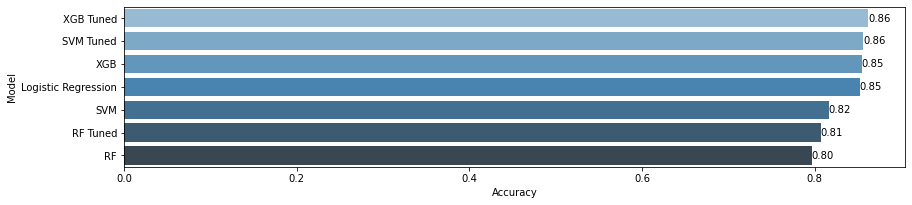

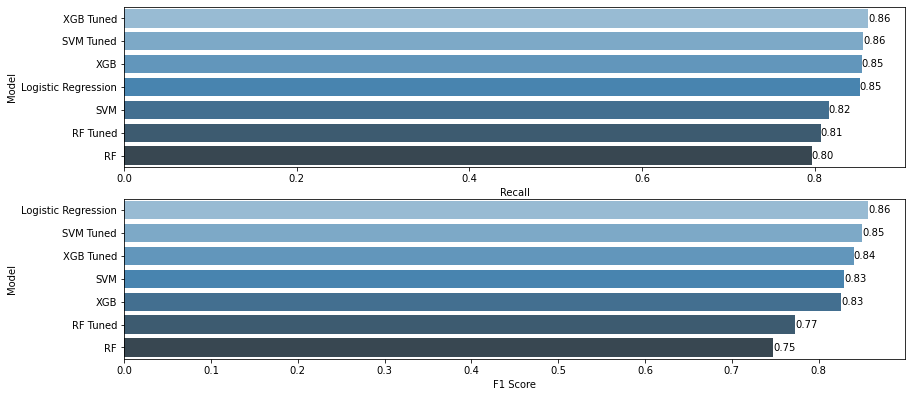

In [109]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "SVM Tuned", "RF", "RF Tuned", "XGB", "XGB Tuned"],
                        "Accuracy": [log_acc, svm_acc, grid_svm_acc, rf_acc, grid_rf_acc, xgb_acc, grid_gxb_acc],
                        "Recall": [log_rc, svm_rc, grid_svm_rc, rf_rc, grid_rf_rc, xgb_rc, grid_xgb_rc],
                        "F1 Score": [log_f1, svm_f1, grid_svm_f1, rf_f1, grid_rf_f1, xgb_f1, grid_xgb_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
        
plt.figure(figsize=(14,10))
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---